In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment (1).csv to CarPrice_Assignment (1).csv


In [3]:
car =  pd.read_csv("CarPrice_Assignment (1).csv",index_col = 0)

In [4]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
car.shape

(205, 25)

In [86]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [88]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Scatter plot and Correlation analysis

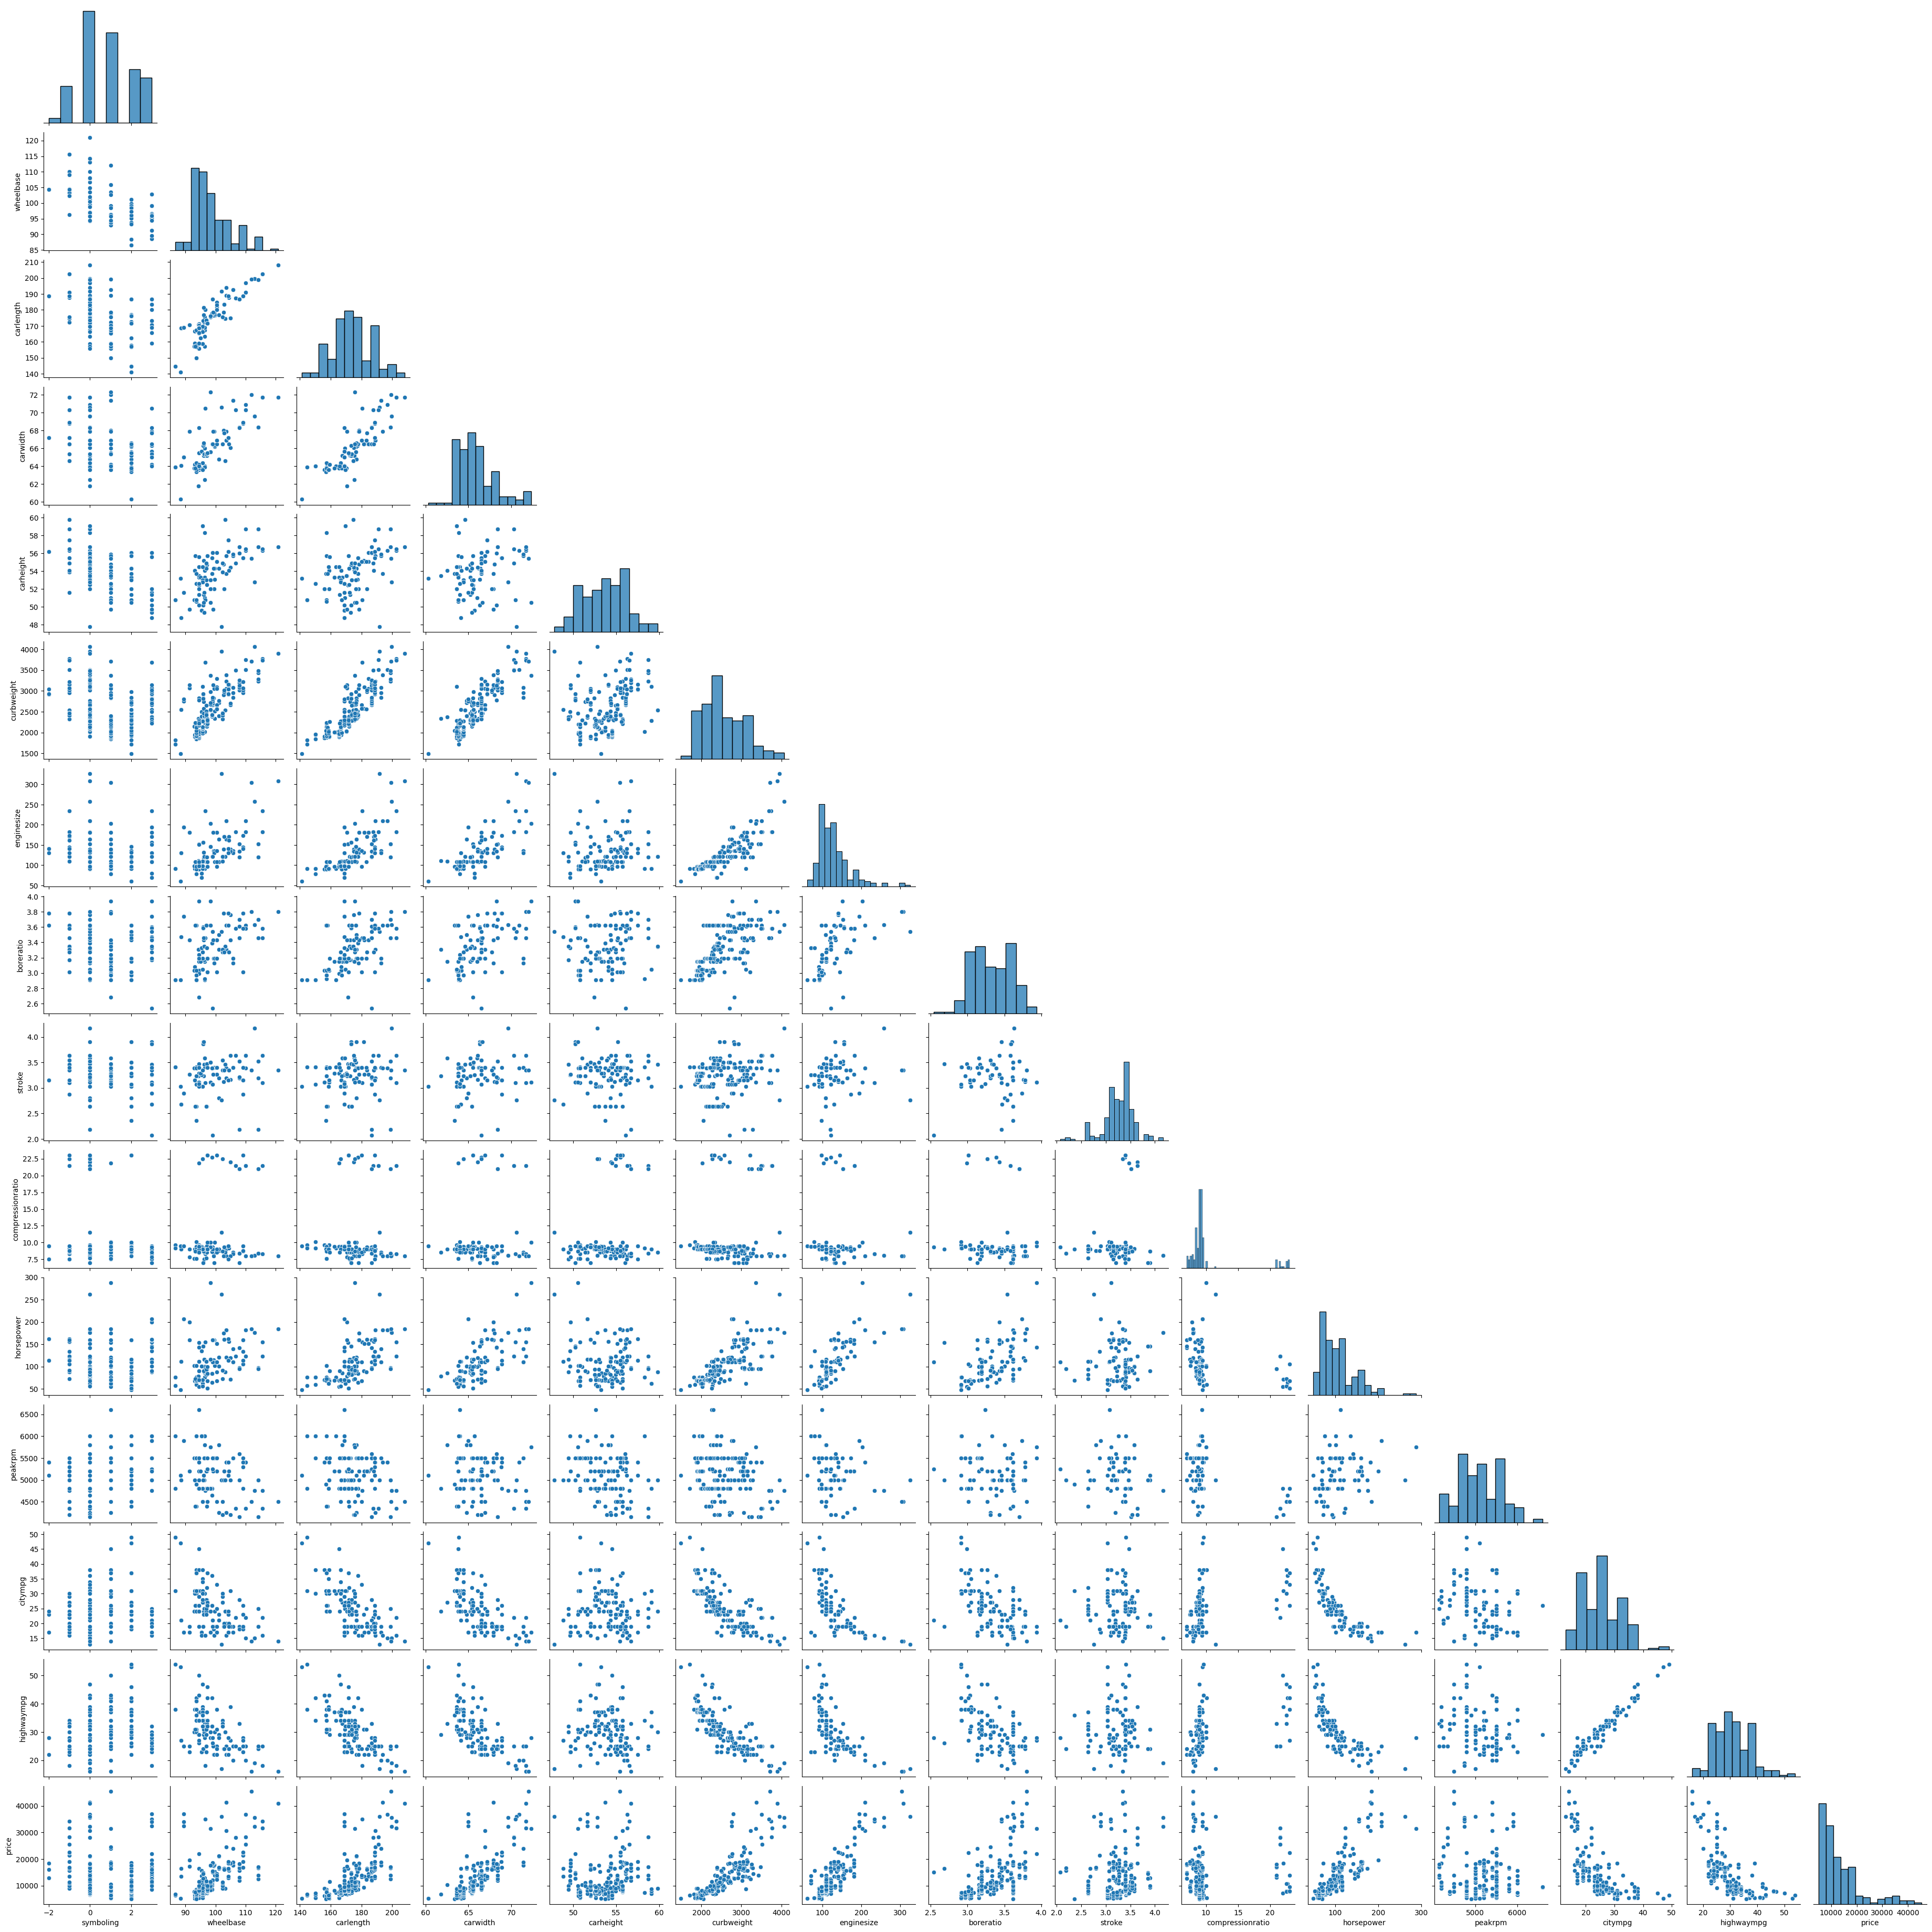

In [127]:
# Create the default pairplot
sns.pairplot(car, corner = True)

In [128]:
car.corr()

<ipython-input-128-3553584bfafd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.corr()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<ipython-input-137-0c2e9b6590ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car.corr()


<Axes: >

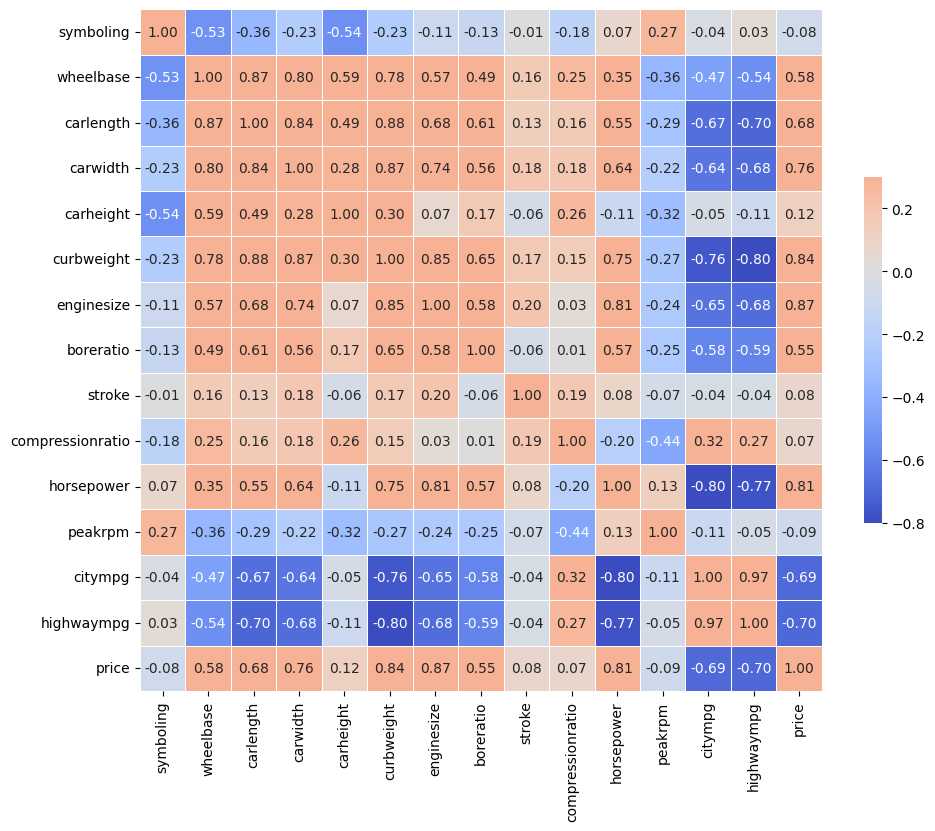

In [137]:
corr = car.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")



In [7]:
car['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Text(0, 0.5, 'Count')

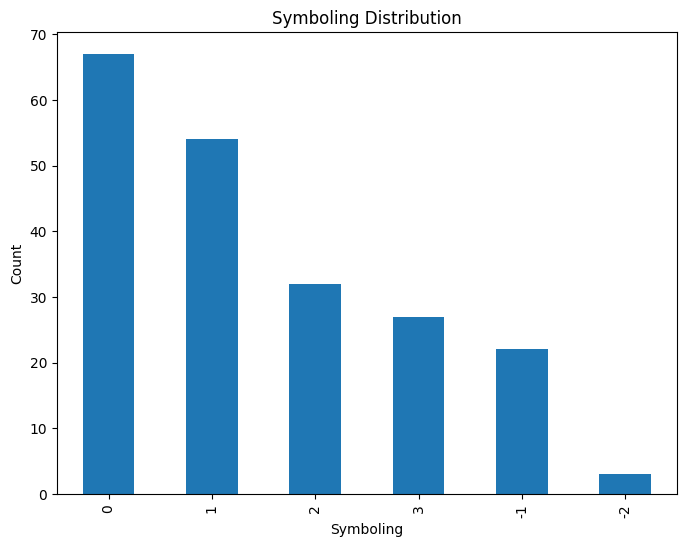

In [8]:
plt.figure(figsize=(8,6))
car['symboling'].value_counts().plot(kind='bar')
plt.title('Symboling Distribution')
plt.xlabel('Symboling')
plt.ylabel('Count')


In [9]:
# Group the data by 'symboling' and calculate the mean of 'price' for each group
symboling_price = car.groupby('symboling')['price'].mean()

# Print the result
print(symboling_price)

symboling
-2    15781.666667
-1    17330.681818
 0    14366.965179
 1    10037.907407
 2    10109.281250
 3    17221.296296
Name: price, dtype: float64


Cars with a symboling of -2 have an average price of approximately 15781.67
Cars with a symboling of -1 have an average price of approximately 17330.68
Cars with a symboling of 0 have an average price of approximately 14366.97
Cars with a symboling of 1 have an average price of approximately 10037.91
Cars with a symboling of 2 have an average price of approximately 10109.28
Cars with a symboling of 3 have an average price of approximately 17221.30

From these results, it seems that the symboling of a car could be a significant factor in predicting its price, as the average prices vary quite a bit across different symboling values.

Text(0, 0.5, 'Average Price')

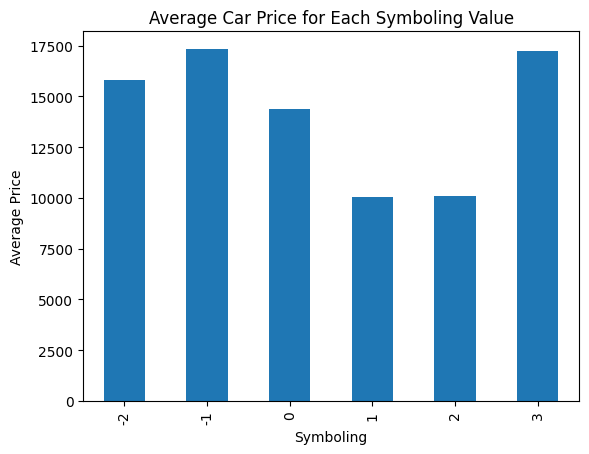

In [10]:
symboling_price.plot(kind='bar')
plt.title('Average Car Price for Each Symboling Value')
plt.xlabel('Symboling')
plt.ylabel('Average Price')

In [11]:
car['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [12]:
# Correct the misspellings

car['CarName'] = car['CarName'].str.replace('maxda', 'mazda')
car['CarName'] = car['CarName'].str.replace('vokswagen', 'volkswagen')
car['CarName'] = car['CarName'].str.replace('vw', 'volkswagen')
car['CarName'] = car['CarName'].str.replace('porcshce', 'porsche')
car['CarName'] = car['CarName'].str.replace('toyouta', 'toyota')

# Keep only the make of the car
car['CarName'] = car['CarName'].apply(lambda x: x.split(' ')[0])

car['CarName'] = car['CarName'].str.lower()


In [13]:
print(car['CarName'].value_counts())

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64


In [14]:
#Missing Values:

car.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Text(0, 0.5, 'Count')

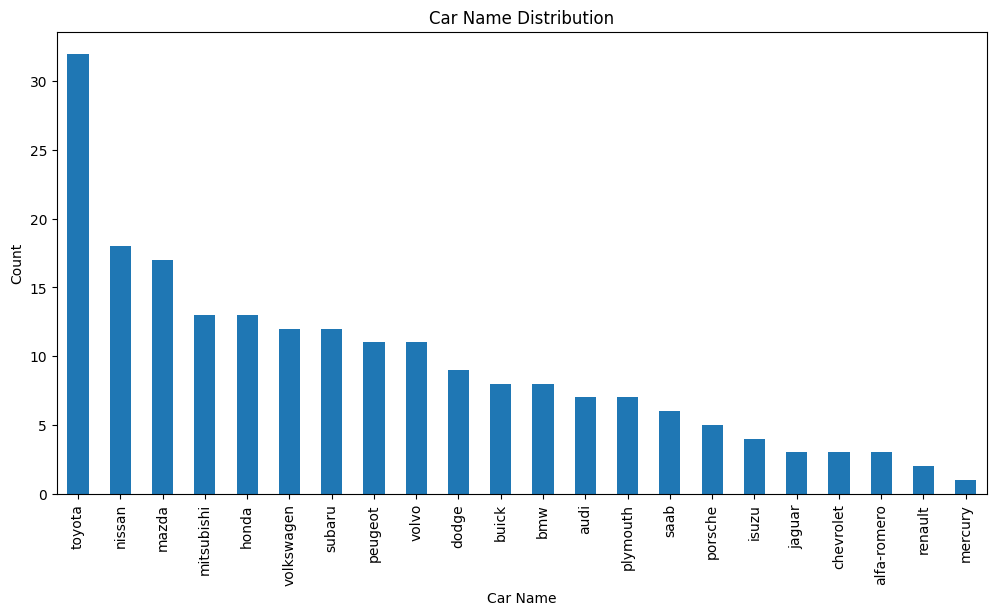

In [15]:
car['CarName'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Car Name Distribution')
plt.xlabel('Car Name')
plt.ylabel('Count')



In [16]:
car_name_price = car.groupby('CarName')['price'].mean()
print(car_name_price)


CarName
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64


From these results, it seems that the CarName of a car could be a significant factor in predicting its price, as the average prices vary quite a bit across different CarName values.

Text(0, 0.5, 'Average Price')

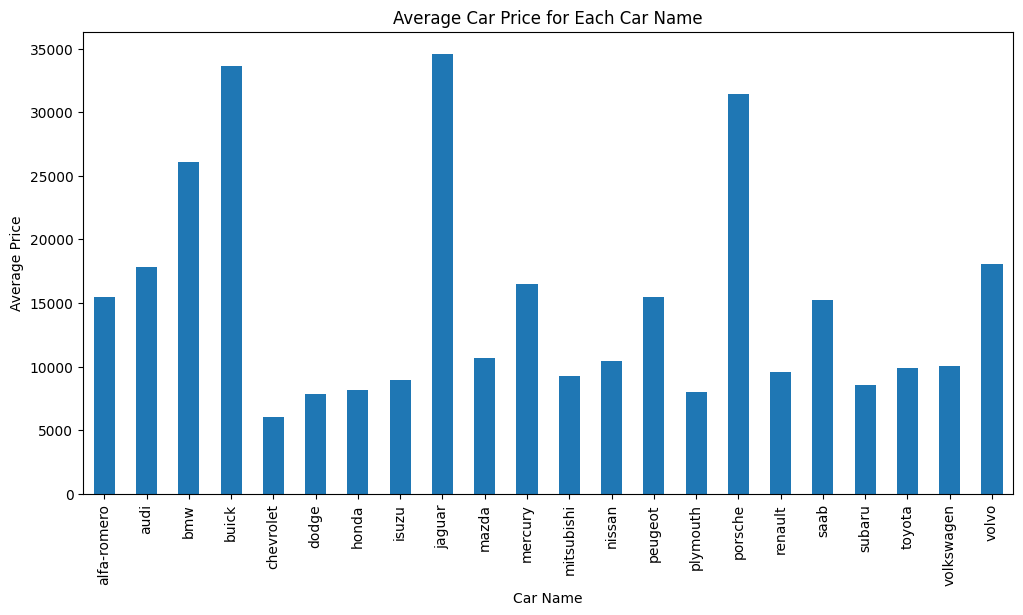

In [17]:
car_name_price.plot(kind='bar', figsize=(12,6))
plt.title('Average Car Price for Each Car Name')
plt.xlabel('Car Name')
plt.ylabel('Average Price')

In [18]:
car['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

Text(0, 0.5, 'Count')

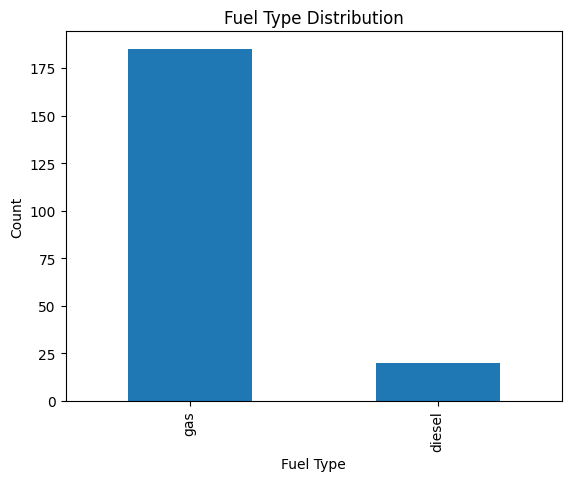

In [19]:
car['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

From the above bar graph, it appears that there are two categories: ‘gas’ and ‘diesel’, with ‘gas’ being the more common fuel type.

In [20]:
fueltype_price = car.groupby('fueltype')['price'].mean()
print(fueltype_price)

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64


From these results, it seems that the fueltype of a car could be a significant factor in predicting its price, as the average prices vary between ‘diesel’ and ‘gas’.

Text(0, 0.5, 'Average Price')

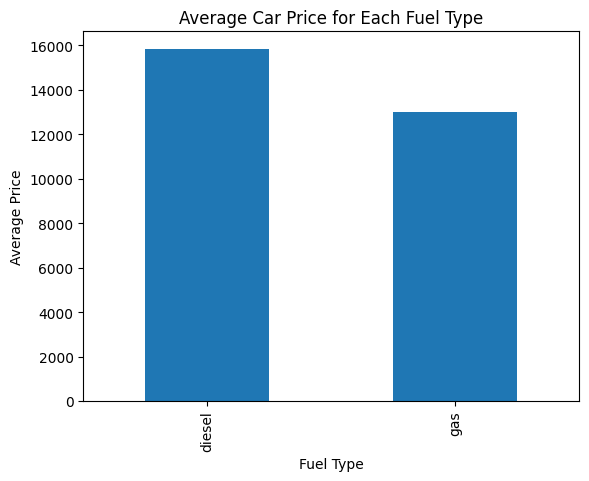

In [21]:
fueltype_price.plot(kind='bar')
plt.title('Average Car Price for Each Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

In [22]:
car['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

Text(0, 0.5, 'Count')

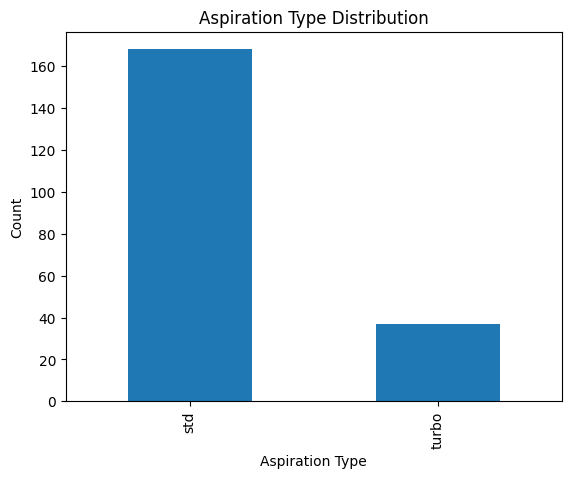

In [23]:
car['aspiration'].value_counts().plot(kind='bar')
plt.title('Aspiration Type Distribution')
plt.xlabel('Aspiration Type')
plt.ylabel('Count')

In [24]:
aspiration_price = car.groupby('aspiration')['price'].mean()
print(aspiration_price)


aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64


Text(0, 0.5, 'Average Price')

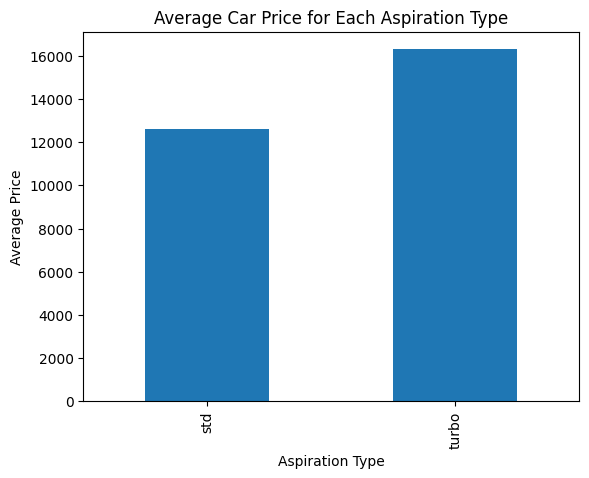

In [25]:
aspiration_price.plot(kind='bar')
plt.title('Average Car Price for Each Aspiration Type')
plt.xlabel('Aspiration Type')
plt.ylabel('Average Price')



In [26]:
car['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

Text(0, 0.5, 'Count')

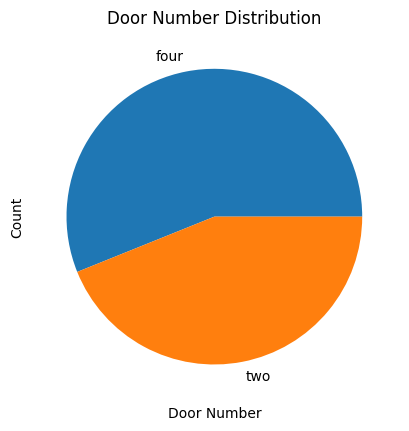

In [27]:
car['doornumber'].value_counts().plot(kind='pie')
plt.title('Door Number Distribution')
plt.xlabel('Door Number')
plt.ylabel('Count')



In [28]:
doornumber_price = car.groupby('doornumber')['price'].mean()
print(doornumber_price)


doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64


Text(0, 0.5, 'Average Price')

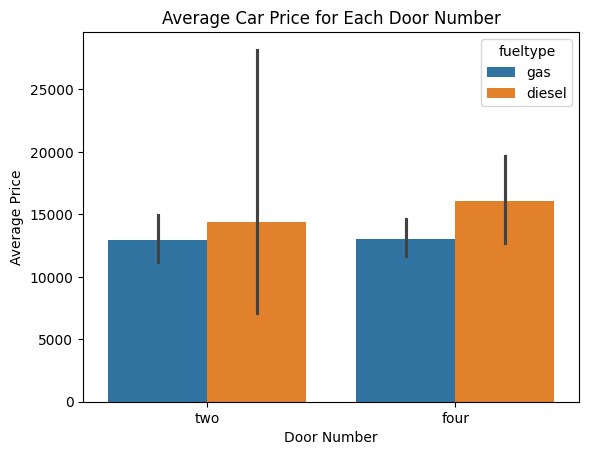

In [29]:
# Create a barplot with 'fueltype' as hue
sns.barplot(x='doornumber', y='price', hue='fueltype', data=car)
plt.title('Average Car Price for Each Door Number')
plt.xlabel('Door Number')
plt.ylabel('Average Price')

In [30]:
car['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

Text(0, 0.5, 'Count')

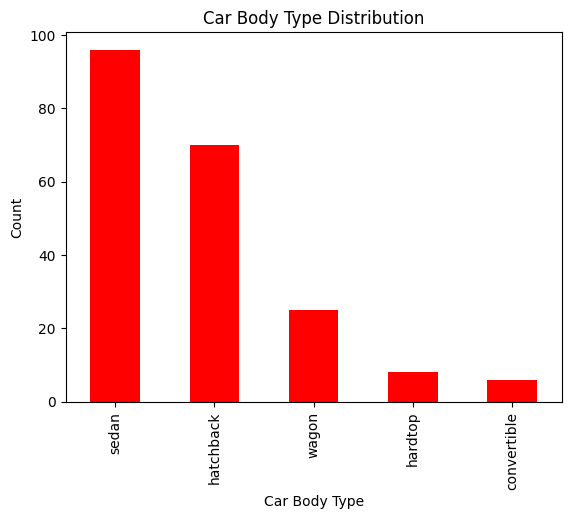

In [31]:
car['carbody'].value_counts().plot(kind='bar', color = 'red')
plt.title('Car Body Type Distribution')
plt.xlabel('Car Body Type')
plt.ylabel('Count')

In [32]:
carbody_price = car.groupby('carbody')['price'].mean()
print(carbody_price)


carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64


Text(0, 0.5, 'Average Price')

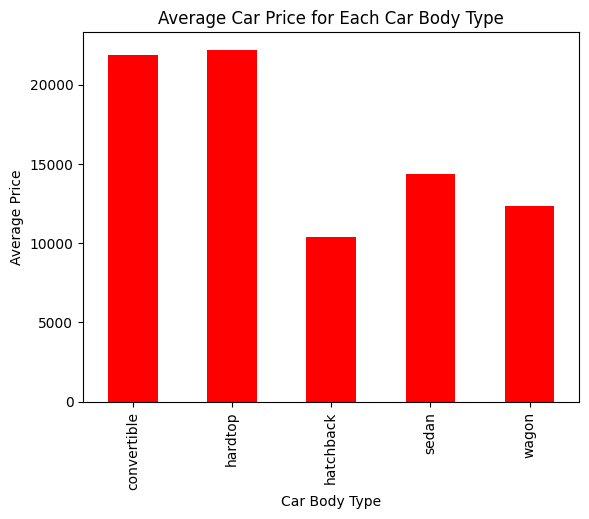

In [33]:
carbody_price.plot(kind='bar', color = 'red')
plt.title('Average Car Price for Each Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Average Price')

In [34]:
car['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

Text(0, 0.5, 'Count')

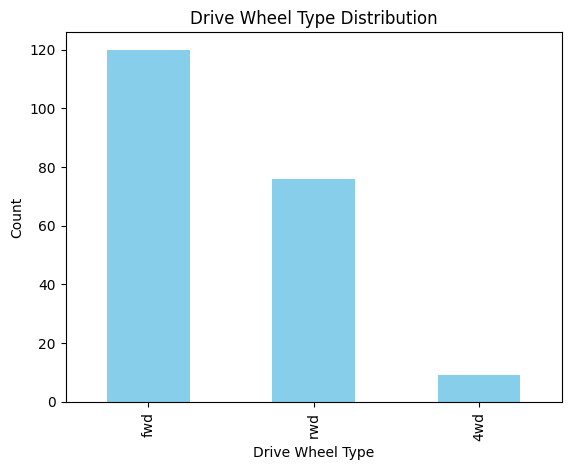

In [35]:
car['drivewheel'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Drive Wheel Type Distribution')
plt.xlabel('Drive Wheel Type')
plt.ylabel('Count')

In [36]:
drivewheel_price = car.groupby('drivewheel')['price'].mean()
print(drivewheel_price)


drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64


Text(0, 0.5, 'Average Price')

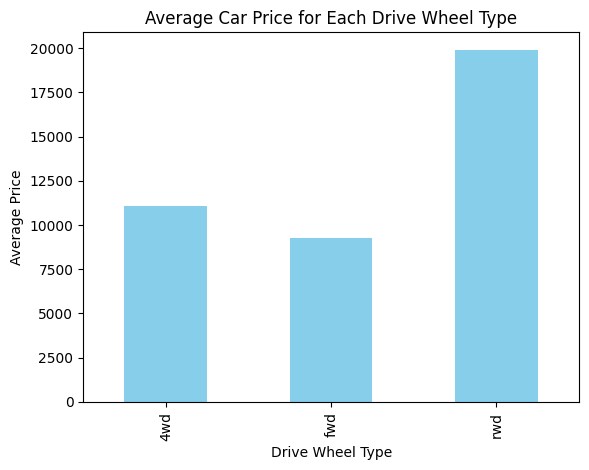

In [37]:
drivewheel_price.plot(kind='bar', color='skyblue')
plt.title('Average Car Price for Each Drive Wheel Type')
plt.xlabel('Drive Wheel Type')
plt.ylabel('Average Price')

In [38]:
car['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

Text(0, 0.5, 'Count')

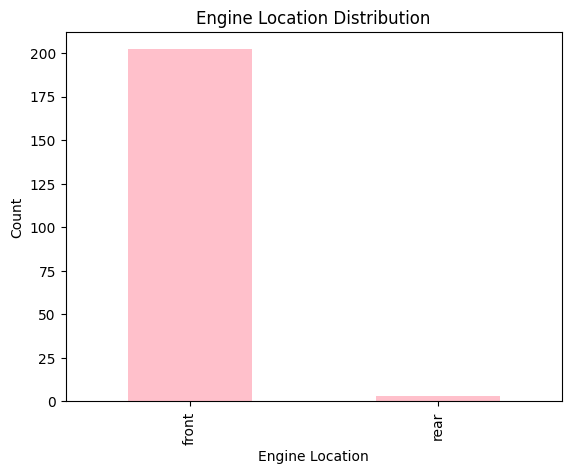

In [39]:
car['enginelocation'].value_counts().plot(kind='bar', color='pink')
plt.title('Engine Location Distribution')
plt.xlabel('Engine Location')
plt.ylabel('Count')

In [40]:
enginelocation_price = car.groupby('enginelocation')['price'].mean()
print(enginelocation_price)


enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64


Text(0, 0.5, 'Average Price')

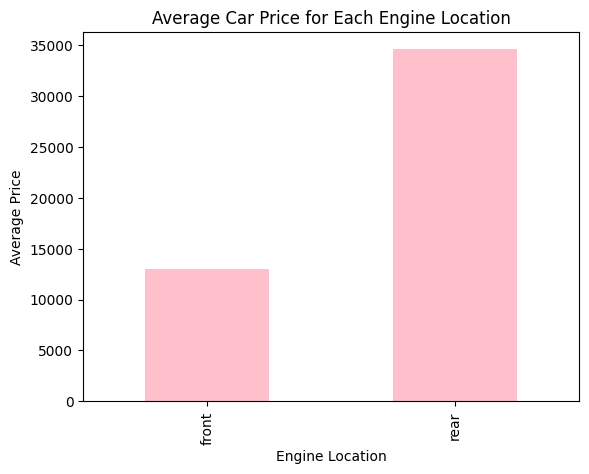

In [41]:
enginelocation_price.plot(kind='bar', color='pink')
plt.title('Average Car Price for Each Engine Location')
plt.xlabel('Engine Location')
plt.ylabel('Average Price')

In [43]:
car['wheelbase'].describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

Text(0, 0.5, 'Count')

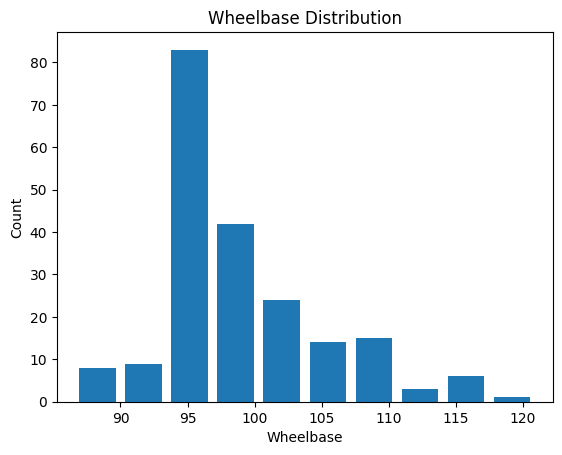

In [44]:
car['wheelbase'].plot(kind='hist', rwidth=0.8)
plt.title('Wheelbase Distribution')
plt.xlabel('Wheelbase')
plt.ylabel('Count')

### Analyzing how wheelbase impacts the car price by plotting a scatter plot of wheelbase against price. If there is a clear pattern or trend in the scatter plot, wheelbase could be a significant factor in predicting car prices.

Text(0, 0.5, 'Price')

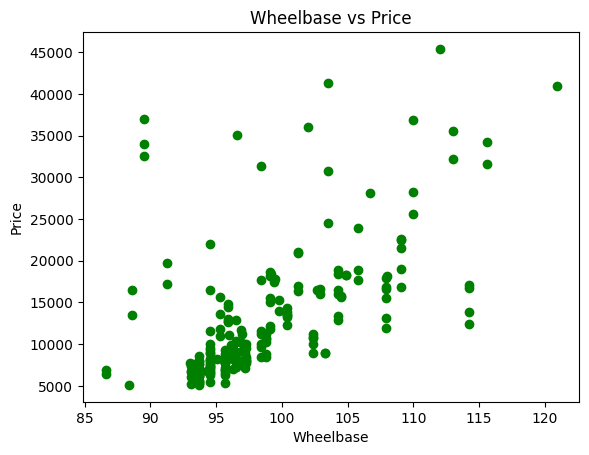

In [45]:
plt.scatter(car['wheelbase'], car['price'], color = 'green')
plt.title('Wheelbase vs Price')
plt.xlabel('Wheelbase')
plt.ylabel('Price')

In [47]:
car['carlength'].value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: carlength, Length: 75, dtype: int64

Text(0.5, 1.0, 'Car Length vs Price')

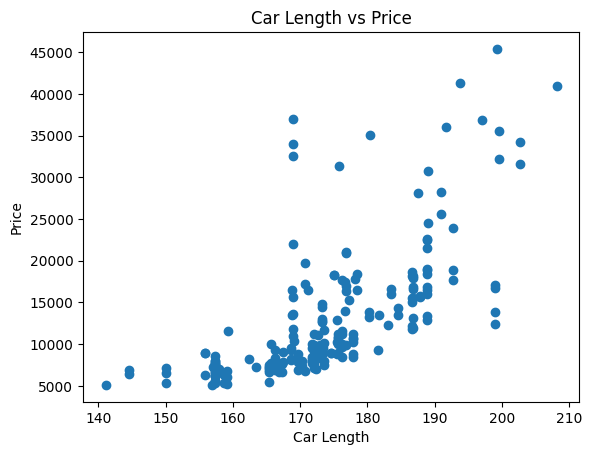

In [48]:
plt.scatter(car['carlength'], car['price'])
plt.xlabel('Car Length')
plt.ylabel('Price')
plt.title('Car Length vs Price')

In [50]:
car['carwidth'].value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: carwidth, dtype: int64

Text(0.5, 1.0, 'Car Width vs Price')

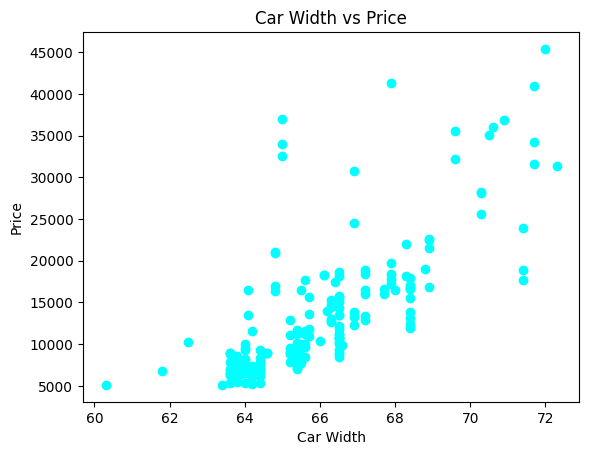

In [70]:
plt.scatter(car['carwidth'], car['price'], color= 'cyan')
plt.xlabel('Car Width')
plt.ylabel('Price')
plt.title('Car Width vs Price')

In [52]:
car['carheight'].value_counts()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: carheight, dtype: int64

Text(0.5, 1.0, 'Car Height vs Price')

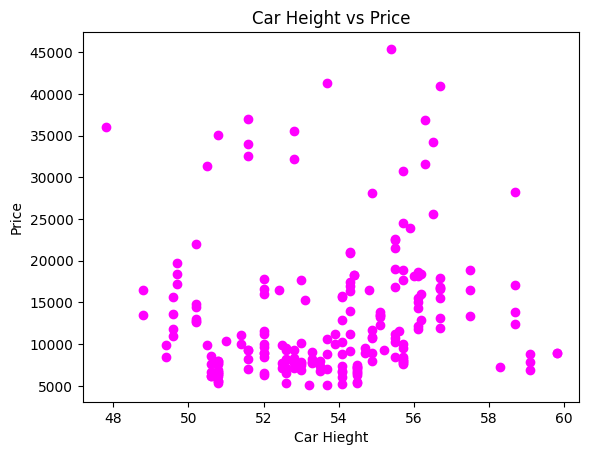

In [71]:
plt.scatter(car['carheight'], car['price'], color='magenta')
plt.xlabel('Car Hieght')
plt.ylabel('Price')
plt.title('Car Height vs Price')

In [55]:
car['curbweight'].value_counts()

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curbweight, Length: 171, dtype: int64

Text(0.5, 1.0, 'Curbe Weight Vs Price')

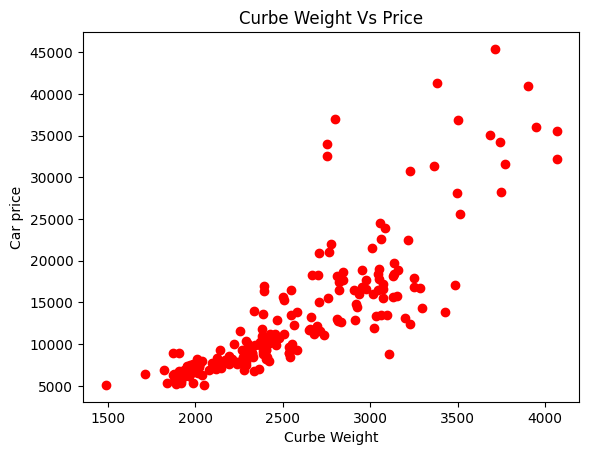

In [65]:
plt.scatter(car['curbweight'],car['price'], color='red')
plt.xlabel('Curbe Weight')
plt.ylabel('Car price')
plt.title('Curbe Weight Vs Price')

In [58]:
car['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

Text(0.5, 1.0, 'Engine Type Vs Price')

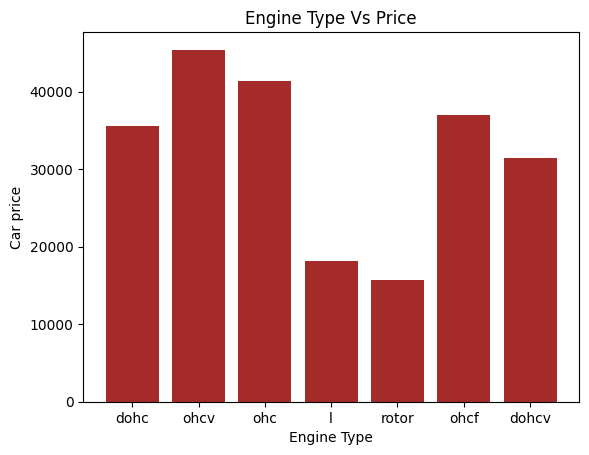

In [64]:
plt.bar(car['enginetype'],car['price'], color='brown')
plt.xlabel('Engine Type')
plt.ylabel('Car price')
plt.title('Engine Type Vs Price')

In [61]:
car['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

Text(0.5, 1.0, 'Cylinder Number Vs Price')

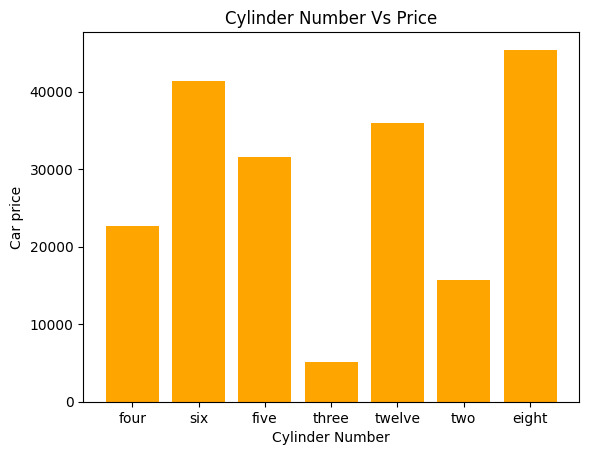

In [63]:
plt.bar(car['cylindernumber'],car['price'], color='orange')
plt.xlabel('Cylinder Number')
plt.ylabel('Car price')
plt.title('Cylinder Number Vs Price')

In [74]:
car['enginesize'].value_counts()

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: enginesize, dtype: int64

Text(0.5, 1.0, 'Engine size Vs Price')

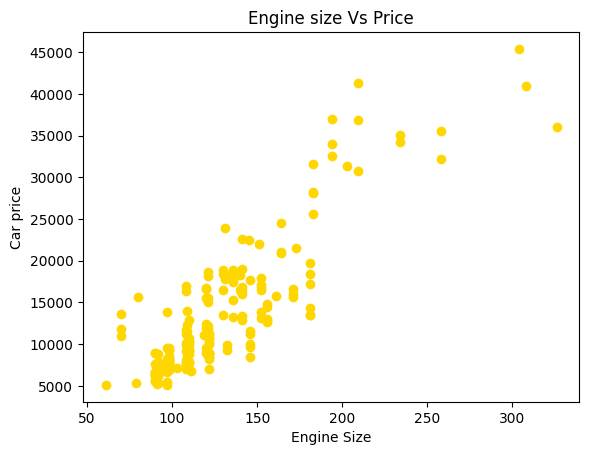

In [75]:
plt.scatter(car['enginesize'],car['price'], color='#FFD700' )
plt.xlabel('Engine Size')
plt.ylabel('Car price')
plt.title('Engine size Vs Price')

In [78]:
car['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

Text(0.5, 1.0, 'Fuel System Vs Price')

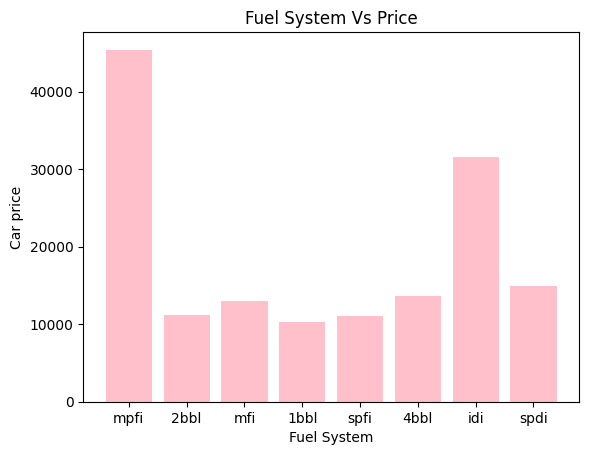

In [79]:
plt.bar(car['fuelsystem'],car['price'], color='pink' )
plt.xlabel('Fuel System')
plt.ylabel('Car price')
plt.title('Fuel System Vs Price')

In [80]:
car['boreratio'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.58     6
3.39     6
3.33     6
3.05     6
3.54     6
3.70     5
3.01     5
3.35     4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.63     2
3.13     2
3.80     2
3.50     2
2.54     1
3.08     1
3.61     1
3.34     1
2.68     1
3.60     1
2.92     1
3.76     1
2.99     1
Name: boreratio, dtype: int64

Text(0.5, 1.0, 'Bore Ratio Vs Price')

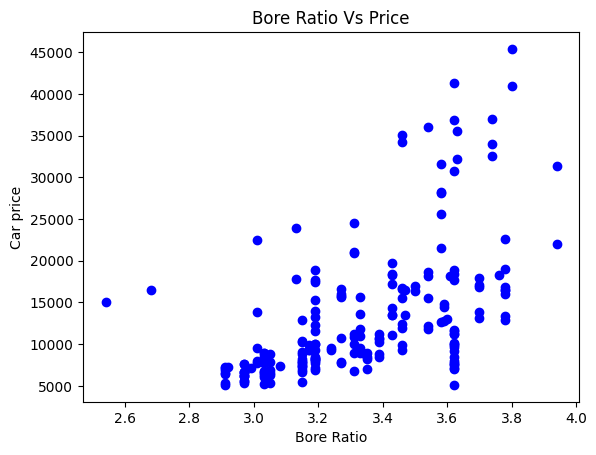

In [81]:
plt.scatter(car['boreratio'],car['price'], color='blue' )
plt.xlabel('Bore Ratio')
plt.ylabel('Car price')
plt.title('Bore Ratio Vs Price')

In [83]:
car['stroke'].value_counts()

3.400    20
3.230    14
3.150    14
3.030    14
3.390    13
2.640    11
3.290     9
3.350     9
3.460     8
3.110     6
3.270     6
3.410     6
3.070     6
3.580     6
3.190     6
3.500     6
3.640     5
3.520     5
3.860     4
3.540     4
3.470     4
3.255     4
3.900     3
2.900     3
3.100     2
4.170     2
2.800     2
2.190     2
3.080     2
2.680     2
2.360     1
3.160     1
2.070     1
3.210     1
3.120     1
2.760     1
2.870     1
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Car stroke vs Car price')

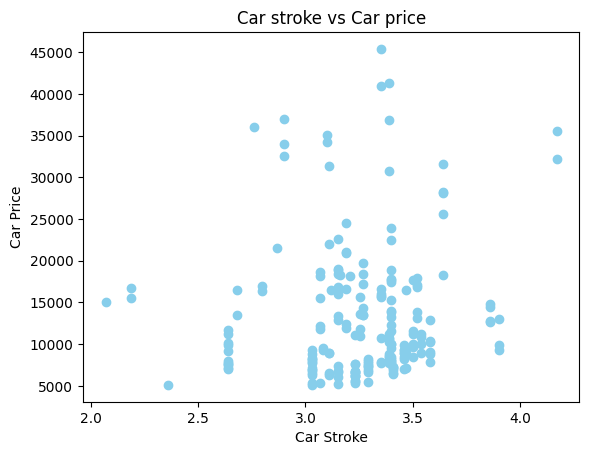

In [84]:
plt.scatter(car['stroke'],car['price'],color='skyblue')
plt.xlabel('Car Stroke')
plt.ylabel('Car Price')
plt.title('Car stroke vs Car price')

In [89]:
car['compressionratio'].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compressionratio, dtype: int64

Text(0.5, 1.0, 'Compression Ratio vs Car price')

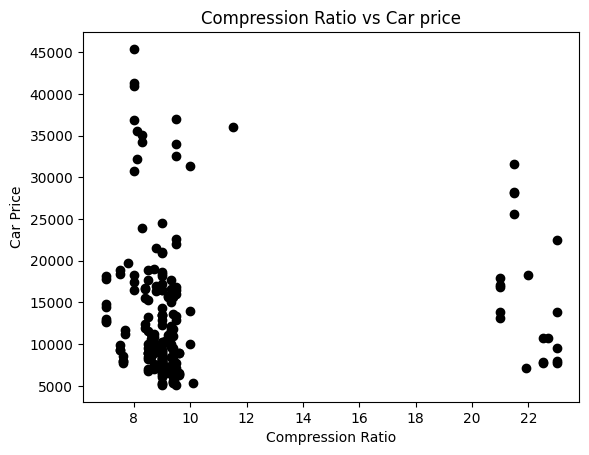

In [94]:
plt.scatter(car['compressionratio'],car['price'],color='black')
plt.xlabel('Compression Ratio')
plt.ylabel('Car Price')
plt.title('Compression Ratio vs Car price')

In [97]:
correlation = car['compressionratio'].corr(car['price'])
print(f"The correlation between compression ratio and price is {correlation}")


The correlation between compression ratio and price is 0.06798350579944265


The correlation coefficient of 0.06798350579944265 between compression ratio and price indicates a very weak positive relationship. This suggests that the ‘compressionratio’ variable might not be a strong predictor for the price of a car.

In [99]:
car['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
84      5
90      5
82      5
102     5
92      4
111     4
123     4
86      4
207     3
73      3
182     3
121     3
85      3
152     3
176     2
94      2
56      2
112     2
161     2
184     2
155     2
156     2
52      2
100     2
162     2
140     1
115     1
134     1
78      1
142     1
288     1
143     1
48      1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64

Text(0.5, 1.0, 'Horsepower vs Car price')

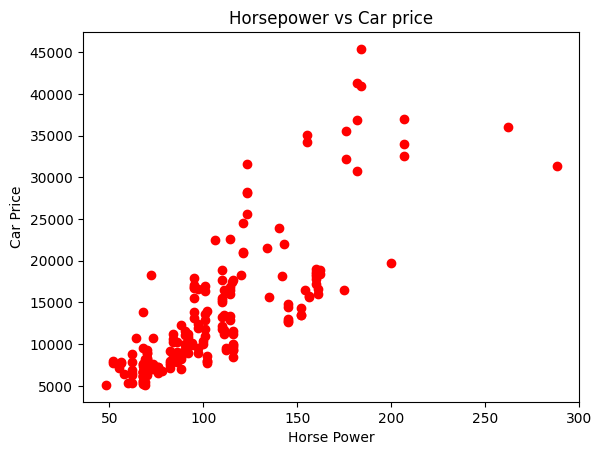

In [100]:
plt.scatter(car['horsepower'],car['price'],color='red')
plt.xlabel('Horse Power')
plt.ylabel('Car Price')
plt.title('Horsepower vs Car price')

In [101]:
car['peakrpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5800     7
5250     7
5100     5
4150     5
4200     5
4350     4
4750     4
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peakrpm, dtype: int64

Text(0.5, 1.0, 'Peak RPM vs Car price')

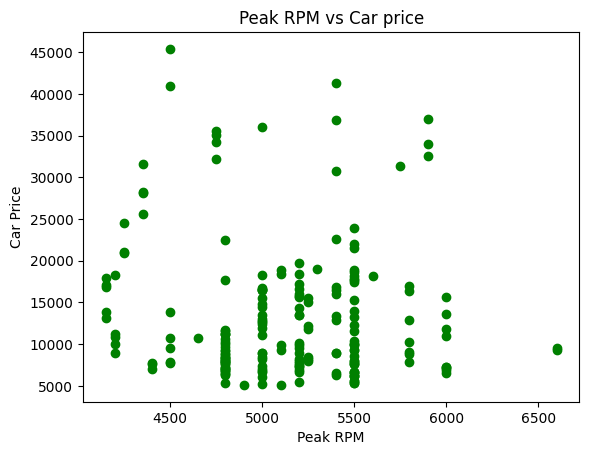

In [102]:
plt.scatter(car['peakrpm'],car['price'],color='green')
plt.xlabel('Peak RPM')
plt.ylabel('Car Price')
plt.title('Peak RPM vs Car price')

In [103]:
correlation = car['peakrpm'].corr(car['price'])
print(f"The correlation between Peak RPM and price is {correlation}")


The correlation between Peak RPM and price is -0.08526715027785685


The correlation coefficient of -0.08526715027785685 between Peak RPM and price indicates a very weak negative relationship. This means that as the Peak RPM increases, the price tends to decrease slightly, and vice versa. However, because the correlation is very weak, this relationship is not strong and the ‘Peak RPM’ variable might not be a significant predictor for the price of a car.

In [104]:
car['citympg'].value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: citympg, dtype: int64

Text(0.5, 1.0, 'City MPG vs Car price')

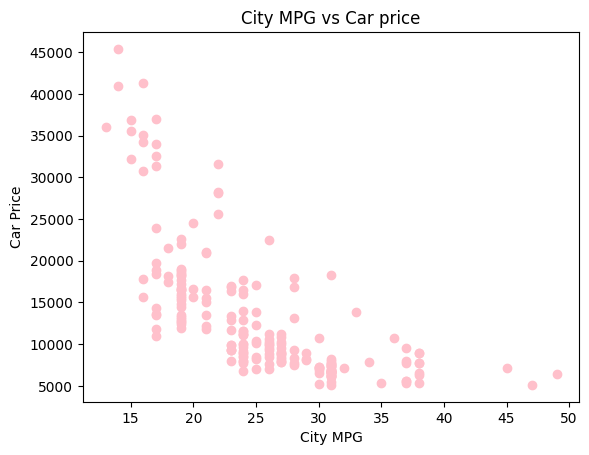

In [111]:
plt.scatter(car['citympg'],car['price'],color='pink')
plt.xlabel('City MPG')
plt.ylabel('Car Price')
plt.title('City MPG vs Car price')

In [106]:
correlation = car['citympg'].corr(car['price'])
print(f"The correlation between City MPG and price is {correlation}")


The correlation between City MPG and price is -0.6857513360270401


The correlation coefficient of -0.6857513360270401 between City MPG and price indicates a moderate to strong negative relationship. This means that as the City MPG (miles per gallon) increases, the price of the car tends to decrease, and vice versa.

In [110]:
car['highwaympg'].value_counts()

25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highwaympg, dtype: int64

Text(0.5, 1.0, 'highway MPG vs Car price')

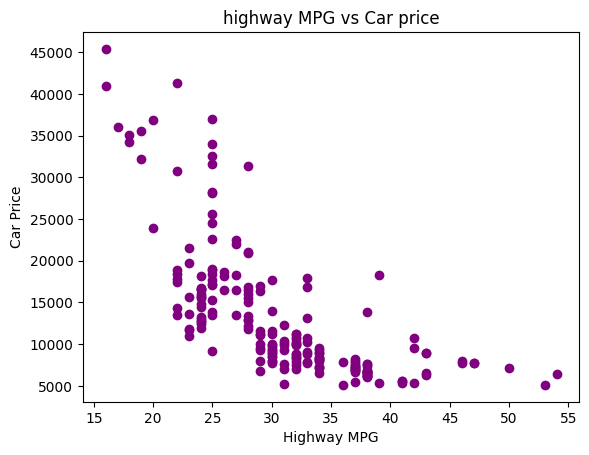

In [113]:
plt.scatter(car['highwaympg'],car['price'],color='purple')
plt.xlabel('Highway MPG')
plt.ylabel('Car Price')
plt.title('highway MPG vs Car price')

In [114]:
correlation= car['highwaympg'].corr(car['price'])
print(f"The correlation between City MPG and price is {correlation}")

The correlation between City MPG and price is -0.6975990916465566


The correlation coefficient of -0.6975990916465566 between City MPG and price indicates a strong negative relationship. This means that as the City MPG (miles per gallon) increases, the price of the car tends to decrease, and vice versa.

# *Data Preprocessing*

In [140]:
# One-hot encoding
car_encoded = pd.get_dummies(car, drop_first=True)

In [118]:
car_encoded

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0


In [139]:
#VIF to check multi-colinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = car_encoded.drop('price', axis=1)

# Calculate VIF for each independent variable
vif = pd.DataFrame()

vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


           features          VIF
0         symboling     6.557911
1         wheelbase    19.770591
2         carlength    24.847410
3          carwidth    15.335046
4         carheight     7.613596
..              ...          ...
59   fuelsystem_idi  1816.366438
60   fuelsystem_mfi     2.306388
61  fuelsystem_mpfi    41.178296
62  fuelsystem_spdi     9.424719
63  fuelsystem_spfi     2.357774

[64 rows x 2 columns]


# Splitting the Data

In [119]:
X = car_encoded.drop('price', axis=1)  # Features
y = car_encoded['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Building

In [121]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Model Evaluation

In [122]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 7128546.783600211
R^2 Score: 0.9097012452093494


# Decision Tree Regressor Model:

In [145]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor object
dt = DecisionTreeRegressor()

# Train the model using the training sets
dt.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Regressor:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_dt)}")



Decision Tree Regressor:
Mean Squared Error: 9226823.778143635
R^2 Score: 0.8831219429244805


# Random Forest Regressor Model:

In [149]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Train the model using the training sets
rf.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred_rf = rf.predict(X_test_scaled)

# Print the predictions
print("Random Forest Regressor:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")



Random Forest Regressor:
Mean Squared Error: 3321026.234807572
R^2 Score: 0.9579318839121439


# Support Vector Regressor Model:

In [150]:
 from sklearn.svm import SVR

# Create a Support Vector Regressor object
svr = SVR()

# Train the model using the training sets
svr.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred_svr = svr.predict(X_test_scaled)

# Print the predictions
print("Support Vector Regressor:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svr)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_svr)}")



Support Vector Regressor:
Mean Squared Error: 86889433.59033778
R^2 Score: -0.10064616195306408
